In [1]:
import imutils
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage.transform import hough_ellipse, hough_line, hough_line_peaks,probabilistic_hough_line
import cv2
import pandas as pd

In [2]:
file_names = os.listdir("highlighted")
file_names = ["highlighted\{}".format(name) for name in file_names]
# file_names = os.listdir("cavity")
# file_names = ["Cavity\{}".format(name) for name in file_names]
imgs = list()
for file_name in file_names:
    img = cv2.imread(file_name)
    imgs.append(img)
# img = cv2.imread("cavity\Cavity_0.bmp")

In [10]:
crops = list()
for image in imgs:
    margin = 0.8 # Cut off the outer 10% of the image
    # Do the polar rotation along 1024 angular steps with a radius of 256 pixels.
    # polar_img = cv2.warpPolar(image, (256, 1024-180-90), (img.shape[0]/2,img.shape[1]/2), image.shape[1]*margin*0.7, cv2.WARP_POLAR_LINEAR)
    
    polar_img = cv2.warpPolar(image, (256, 1024),(253,243), image.shape[1]*margin*0.7, cv2.WARP_POLAR_LINEAR)
    # polar_img = cv2.warpPolar(image, (232, 1024), (243,253), image.shape[1]*margin*0.65, cv2.WARP_POLAR_LINEAR)
    # Rotate it sideways to be more visually pleasing
    polar_img = cv2.rotate(polar_img, cv2.ROTATE_90_COUNTERCLOCKWISE)

    # plt.imshow(polar_img),plt.show()

    crop = polar_img[100:170,680:870]
    # plt.imshow(crop),plt.show()
    crops.append(crop)


print(len(crops))

28


0


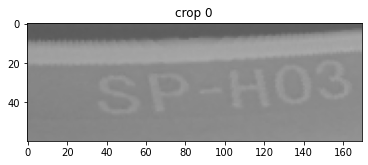

######################
1


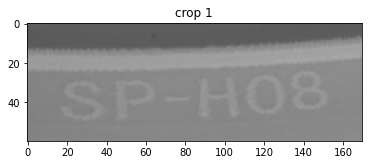

######################
2


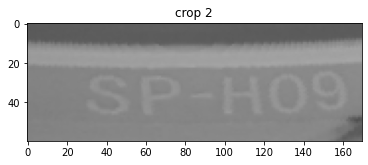

######################
3


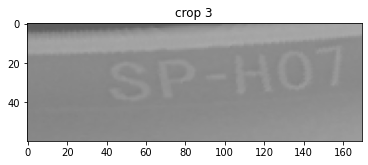

######################
4


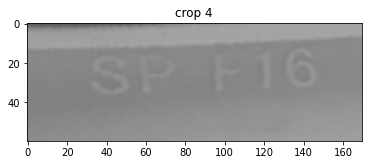

######################
5


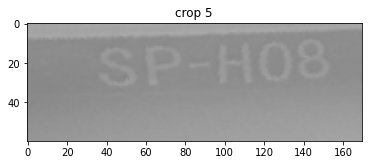

######################
6


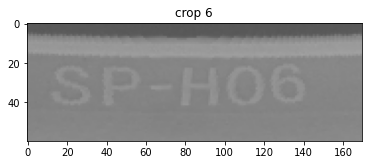

######################
7


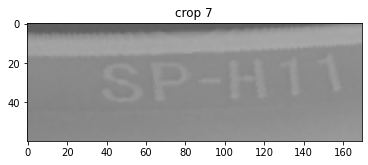

######################
8


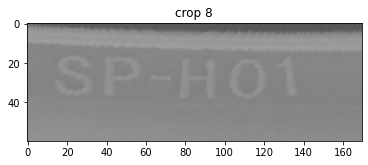

######################
9


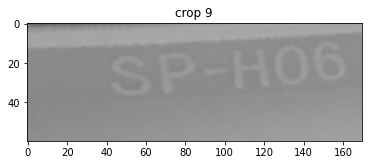

######################
10


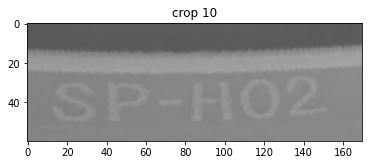

######################
11


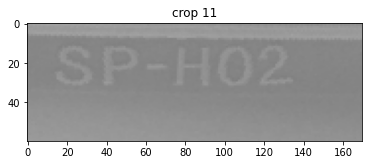

######################
12


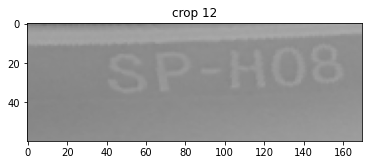

######################
13


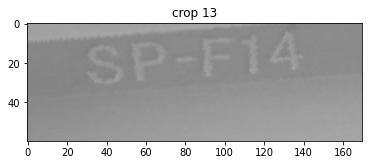

######################
14


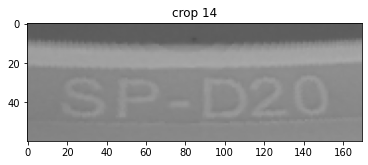

######################
15


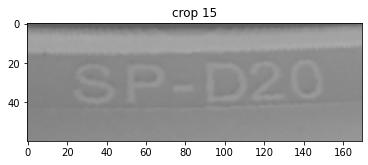

######################
16


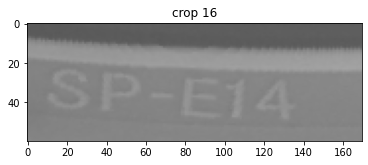

######################
17


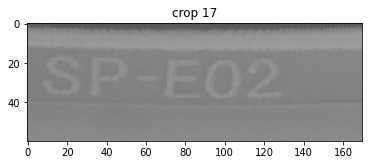

######################
18


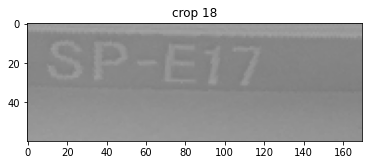

######################
19


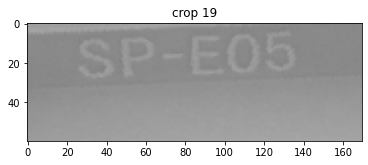

######################
20


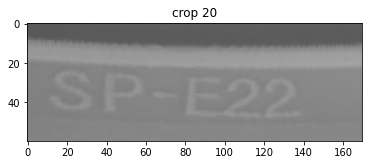

######################
21


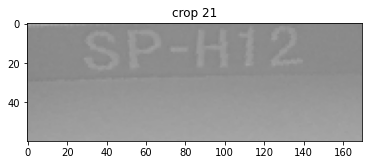

######################
22


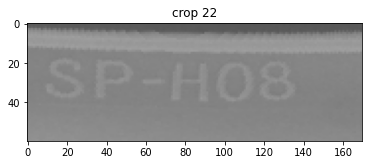

######################
23


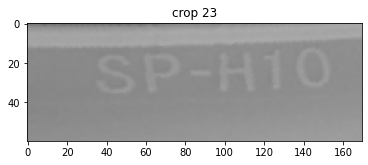

######################
24


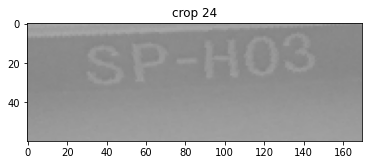

######################
25


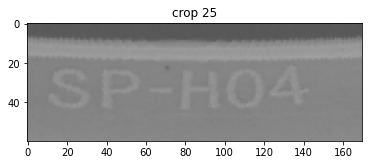

######################
26


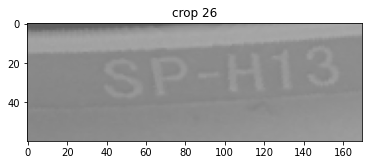

######################
27


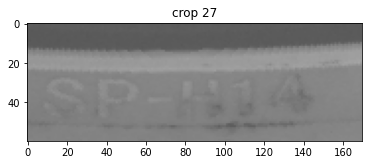

######################
28


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'cv::Canny'


In [9]:
from skimage.transform import rotate

for i in range (len(crops)):
    print(i)
    crop = crops[i]
    blurred_image = cv2.GaussianBlur(crop,(15,15),0)
    edges = cv2.Canny(blurred_image[0:20,:],threshold1= 20, threshold2=40)
    lines = probabilistic_hough_line(edges, threshold=50, line_length=10,
                                 line_gap=3)

    points = list()
    for l in lines:
        points.append(l[0])
        points.append(l[1])
    
    
    points= sorted(points,key=lambda item: item[1],reverse=False)
    
    # print(points)
    
        
    
    # print(dst)
    if len(points)!=0:
        maxp = points[len(points)-1]
        minp= points[0]
        if maxp[1]-minp[1]>=4:
            # print("maxp = {}".format(max_p))

            angle =np.arctan2(maxp[1]-minp[1],maxp[0]-minp[0])
            
            # print("rotating by {}".format(angle))
            # print("rotating by {}".format(np.rad2deg(angle)))
            # angle = np.rad2deg(angle)
            crop= rotate(crop,-angle)

    # plt.imshow(edges),plt.show()

    crop = crop[5:65,10:180]
    plt.imshow(crop),plt.title("crop {}".format(i)),plt.show()
    # print(crop.shape)
    crops.append(crop)
    print("######################")